In [5]:


import matplotlib.pyplot as plt
import numpy as np

from sandpile import *
from utils import *
from multiprocessing import Pool, Process, set_start_method
import multiprocessing as mp



In [6]:

def run_system(task):
    dim, grid, boundary, time_steps, path = task
    system = SandpileND(dim, grid, 7, boundary)
    system(time_steps)
    system.save_data(path)

N = 1_000_000
tasks = [
    (1, 40, "open", N, "data1"),
    (2, 20, "open", N, "data2"),
    (3, 15, "open", N, "data3"),
    (1, 40, "closed", N, "data1_closed"),
    (2, 20, "closed", N, "data2_closed"),
    (3, 15, "closed", N, "data3_closed"),
]

ctx = mp.get_context('fork')

with ctx.Pool() as pool:
    pool.map(run_system, tasks)


dim1 grid40 closed:   0%|          | 0/999999 [00:00<?, ?it/s]

dim1 grid40 open:   0%|          | 0/999999 [00:00<?, ?it/s]

dim3 grid15 open:   0%|          | 0/999999 [00:00<?, ?it/s]

dim2 grid20 open:   0%|          | 0/999999 [00:00<?, ?it/s]

dim3 grid15 closed:   0%|          | 0/999999 [00:00<?, ?it/s]

dim2 grid20 closed:   0%|          | 0/999999 [00:00<?, ?it/s]

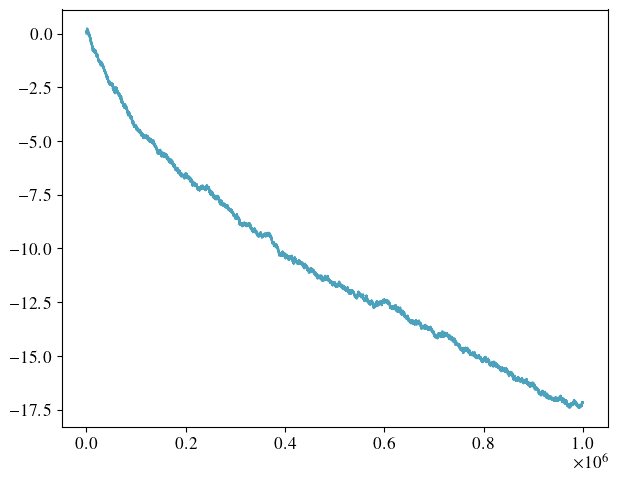

In [37]:
from sandpile import *
import matplotlib.pyplot as plt


plt.figure(1, figsize=(12, 5))

dim = 2
plt.subplot(121)
system = SandpileND.load_from_file(f"data{dim}_closed")

plt.plot(range(system.average_slopes.__len__()), system.average_slopes)

# plt.subplot(122)
# system = SandpileND.load_from_file(f"data{dim}_closed")
# 
# plt.plot(range(system.average_slopes.__len__()), system.average_slopes)




In [38]:
data = system.get_avalanche_data()


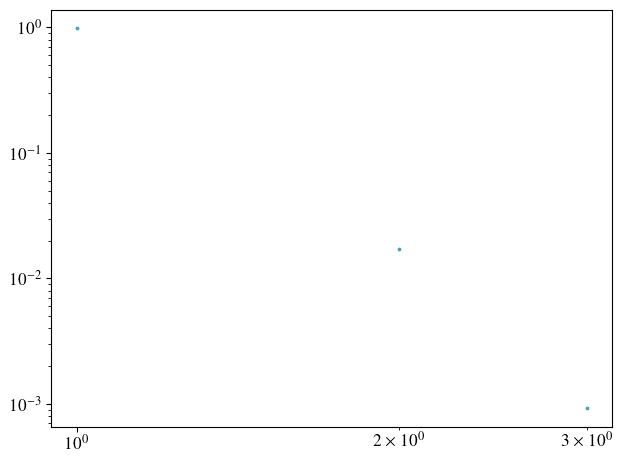

In [39]:
size, time_steps = get_hist(data["size"])

plt.yscale("log")
plt.xscale("log")
plt.scatter(time_steps, size, s=3)